## Topic Modeling & LDA
- find word topics by author & text

#### Gender & Era
discuss....

In [60]:
import pandas as pd
#topic modeling & LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import plotly_express as px

%matplotlib inline

In [13]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
n_terms = 8000
n_topics = 35
max_iter = 5
OHCO = ['title', 'author', 'para_num', 'gender', 'era']

In [15]:
#import tables
TOKENS = pd.read_csv('TOKEN2.csv')

In [16]:
TOKENS.head()

text_id  para_num  sent_num  token_num           pos_tuple pos token_str  \
0        1        16         0          0     ('Every', 'DT')  DT     Every   
1        1        16         0          1       ('art', 'NN')  NN       art   
2        1        16         0          2       ('and', 'CC')  CC       and   
3        1        16         0          3     ('every', 'DT')  DT     every   
4        1        16         0          4  ('inquiry,', 'NN')  NN  inquiry,   

  term_str  term_id              title     author  \
0    every    15890  NicomachaenEthics  Aristotle   
1      art     2942  NicomachaenEthics  Aristotle   
2      and     1976  NicomachaenEthics  Aristotle   
3    every    15890  NicomachaenEthics  Aristotle   
4  inquiry    23364  NicomachaenEthics  Aristotle   

                                            file  
0  philostexts\Aristotle_NicomachaenEthics-1.txt  
1  philostexts\Aristotle_NicomachaenEthics-1.txt  
2  philostexts\Aristotle_NicomachaenEthics-1.txt  
3  philostexts\Aristotle_NicomachaenEthics-1.txt  
4  philostexts\Aristotle_NicomachaenEthics-1.txt

In [17]:
#create GENDER column in tokens table 
TOKENS.loc[TOKENS.author.str.contains('Aristotle'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('bellhooks'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Cicero'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Foucault'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Freire'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('HannahArendt'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('HarrietTaylorMill'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Hesse'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Hume'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Kant'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Kierkegaard'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Laozi'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Marx'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('MaryWollstonecraft'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('Nietzsche'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Plato'), 'gender'] = 'M'
TOKENS.loc[TOKENS.author.str.contains('Simonedebeauvoir'), 'gender'] = 'F'
TOKENS.loc[TOKENS.author.str.contains('StuartMill'), 'gender'] = 'M'

In [18]:
#create ERA column in tokens table - ancient, classical, modern
TOKENS.loc[TOKENS.author.str.contains('Aristotle'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('bellhooks'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Cicero'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Foucault'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Freire'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('HannahArendt'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('HarrietTaylorMill'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Hesse'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Hume'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Kant'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Kierkegaard'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('Laozi'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Marx'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('MaryWollstonecraft'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Nietzsche'), 'era'] = 'classical'
TOKENS.loc[TOKENS.author.str.contains('Plato'), 'era'] = 'ancient'
TOKENS.loc[TOKENS.author.str.contains('Simonedebeauvoir'), 'era'] = 'modern'
TOKENS.loc[TOKENS.author.str.contains('StuartMill'), 'era'] = 'classical'

In [19]:
TOKENS

text_id  para_num  sent_num  token_num           pos_tuple  pos  \
0              1        16         0          0     ('Every', 'DT')   DT   
1              1        16         0          1       ('art', 'NN')   NN   
2              1        16         0          2       ('and', 'CC')   CC   
3              1        16         0          3     ('every', 'DT')   DT   
4              1        16         0          4  ('inquiry,', 'NN')   NN   
...          ...       ...       ...        ...                 ...  ...   
1742815        3       179         0          7  ('working', 'VBG')  VBG   
1742816        3       179         0          8     ('class', 'NN')   NN   
1742817        3       179         0          9       ('and', 'CC')   CC   
1742818        3       179         0         10      ('poor', 'JJ')   JJ   
1742819        3       179         0         11    ('women.', 'NN')   NN   

        token_str term_str  term_id                  title     author  \
0           Every    every    15890      NicomachaenEthics  Aristotle   
1             art      art     2942      NicomachaenEthics  Aristotle   
2             and      and     1976      NicomachaenEthics  Aristotle   
3           every    every    15890      NicomachaenEthics  Aristotle   
4        inquiry,  inquiry    23364      NicomachaenEthics  Aristotle   
...           ...      ...      ...                    ...        ...   
1742815   working  working    49741  FeministClassStruggle  bellhooks   
1742816     class    class     7384  FeministClassStruggle  bellhooks   
1742817       and      and     1976  FeministClassStruggle  bellhooks   
1742818      poor     poor    34409  FeministClassStruggle  bellhooks   
1742819    women.    women    49694  FeministClassStruggle  bellhooks   

                                                      file gender      era  
0            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
1            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
2            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
3            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
4            philostexts\Aristotle_NicomachaenEthics-1.txt      M  ancient  
...                                                    ...    ...      ...  
1742815  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  
1742816  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  
1742817  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  
1742818  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  
1742819  philostexts\bellhooks_FeministClassStruggle-3.txt      F   modern  

[1742820 rows x 14 columns]

In [61]:
#save work
TOKENS.to_csv('TOKEN_expanded.csv', index=False)

In [20]:
#Convert TOKENS to table of paragraphs
#group by paragraph string and set indexes
PARAS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'para_str'})
PARAS.head()

para_str
title                        author             para_num gender era                                     
AVindicationOfTheRightsofMen MaryWollstonecraft 75       F      classical  attention transient topic day
                                                76       F      classical          amusement indignation
                                                77       F      classical      arguments moment me shape
                                                78       F      classical                 feelings sense
                                                80       F      classical  pages letter effusions moment

In [21]:
'''#Convert TOKENS to table of texts
#group by text string and set indexes
TEXTS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]\
    .groupby(OHCO[:1]).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'text_str'})
TEXTS.head()'''

"#Convert TOKENS to table of texts\n#group by text string and set indexes\nTEXTS = TOKENS[TOKENS.pos.str.match(r'^NNS?$')]    .groupby(OHCO[:1]).term_str    .apply(lambda x: ' '.join(x))    .to_frame()    .rename(columns={'term_str':'text_str'})\nTEXTS.head()"

#### Create Vector Space 


In [23]:
##Vector Space
#Use Scikit Learn's CountVectorizer to convert F1 corpus of paragraphs
#into a document-term vector space of word counts.
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(PARAS.para_str)
TERMS = tfv.get_feature_names_out()

In [24]:
'''##Vector Space for Paragraph Level
#Use Scikit Learn's CountVectorizer to convert F1 corpus of paragraphs
#into a document-term vector space of word counts.
tfv_para = CountVectorizer(max_features=n_terms, stop_words='english')
tf_para = tfv_para.fit_transform(PARAS.para_str)
TERMS_para = tfv_para.get_feature_names_out()'''

"##Vector Space for Paragraph Level\n#Use Scikit Learn's CountVectorizer to convert F1 corpus of paragraphs\n#into a document-term vector space of word counts.\ntfv_para = CountVectorizer(max_features=n_terms, stop_words='english')\ntf_para = tfv_para.fit_transform(PARAS.para_str)\nTERMS_para = tfv_para.get_feature_names_out()"

In [25]:
'''##Vector Space for TEXT Level
#Use Scikit Learn's CountVectorizer to convert F1 corpus of paragraphs
#into a document-term vector space of word counts.
tfv_text = CountVectorizer(max_features=n_terms, stop_words='english')
tf_text = tfv_text.fit_transform(TEXTS.text_str)
TERMS_text = tfv_text.get_feature_names_out()'''

"##Vector Space for TEXT Level\n#Use Scikit Learn's CountVectorizer to convert F1 corpus of paragraphs\n#into a document-term vector space of word counts.\ntfv_text = CountVectorizer(max_features=n_terms, stop_words='english')\ntf_text = tfv_text.fit_transform(TEXTS.text_str)\nTERMS_text = tfv_text.get_feature_names_out()"

#### Generate LDA Model

In [26]:
#Generate LDA model
#SUse cikit Learn's LatentDirichletAllocation algorithm and extract the THETA and PHI tables.
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

#### THETA

In [27]:
#THETA for texts
THETA = pd.DataFrame(lda.fit_transform(tf), index=PARAS.index)
THETA.columns.name = 'topic_id'
THETA.sample(10).style.background_gradient()

In [28]:
#THETA for paragraphs
'''THETA_para = pd.DataFrame(lda.fit_transform(tf_para), index=PARAS.index)
THETA_para.columns.name = 'topic_id'
THETA_para.sample(10).style.background_gradient()'''

"THETA_para = pd.DataFrame(lda.fit_transform(tf_para), index=PARAS.index)\nTHETA_para.columns.name = 'topic_id'\nTHETA_para.sample(10).style.background_gradient()"

In [29]:
#THETA for texts
'''THETA_text = pd.DataFrame(lda.fit_transform(tf_text), index=TEXTS.index)
THETA_text.columns.name = 'topic_id'
THETA_text.sample(10).style.background_gradient()'''

"THETA_text = pd.DataFrame(lda.fit_transform(tf_text), index=TEXTS.index)\nTHETA_text.columns.name = 'topic_id'\nTHETA_text.sample(10).style.background_gradient()"

#### PHI

In [30]:
#PHI 
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'
PHI.T.head().style.background_gradient()

In [31]:
#PHI for paragraphs
'''PHI_para = pd.DataFrame(lda.components_, columns=TERMS)
PHI_para.index.name = 'topic_id'
PHI_para.columns.name  = 'term_str'
PHI_para.T.head().style.background_gradient()'''

"PHI_para = pd.DataFrame(lda.components_, columns=TERMS)\nPHI_para.index.name = 'topic_id'\nPHI_para.columns.name  = 'term_str'\nPHI_para.T.head().style.background_gradient()"

In [32]:
#PHI for texts
'''PHI_text = pd.DataFrame(lda.components_, columns=TERMS)
PHI_text.index.name = 'topic_id'
PHI_text.columns.name  = 'term_str'
PHI_text.T.head().style.background_gradient()'''

"PHI_text = pd.DataFrame(lda.components_, columns=TERMS)\nPHI_text.index.name = 'topic_id'\nPHI_text.columns.name  = 'term_str'\nPHI_text.T.head().style.background_gradient()"

#### Top Terms per Topic

In [33]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)
TOPICS

term_str           0              1           2           3              4  \
topic_id                                                                     
0          character         object    strength   structure         regard   
1               form          right     country        home        friends   
2             things         mother       years      rights         father   
3             nature           fact       sense      family         source   
4             action           good      spirit        fear      movements   
5               laws         origin        head        book     possession   
6             virtue           soul      desire     feeling           acts   
7                men           body        eyes      manner         female   
8               time      education         age     objects            sex   
9              state       question     opinion  principles         wisdom   
10          property  consciousness      wealth    humanity    imperialism   
11            moment            yes    marriage          op            cit   
12             heart          cases    morality     leaders    bourgeoisie   
13          language          words        self         act         period   
14              hand         person         war       force           duty   
15             women          point        view         men        mankind   
16             place           work     justice     reality           race   
17               man          order   knowledge     society            end   
18        government          times   condition       cause      interests   
19              life           girl        sake    argument        animals   
20              mind      principle  experience        rule      countries   
21            reason      happiness      nation       hands  circumstances   
22            people      existence     respect  individual         future   
23              male          value   situation     subject          basis   
24            course        process   influence      police       feelings   
25             power            way        idea       class         beings   
26              case        thought         day        role          child   
27             woman        history        kind     husband       sciences   
28              love        example   pleasures    contrary         beauty   
29          movement         matter       death        sort           ones   
30             world            law    pleasure     century      relations   
31             thing          truth     freedom        face        meaning   
32          children          party  philosophy         non       elements   
33             means       relation     actions         use          earth   
34             money         number       ideas     species          girls   

term_str            5               6            7             8             9  
topic_id                                                                        
0         possibility           faith         true        ground  consequences  
1           authority           group      attempt  antisemitism      doctrine  
2                need      reflection      reasons         study         music  
3            opinions         conduct     violence     community         stage  
4         individuals          labour       values      presence        figure  
5         differences           claim       method    literature    proportion  
6               labor            term         mans    conditions    domination  
7                evil            sign  development        choice          days  
8          difference  representation     position       persons       element  
9                care           lives   accordance        nation         worth  
10             masses            pain       notion         today         ideal  
11            parents        instance        sight         f

In [34]:
#TOPICS_para['label'] = TOPICS_para.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)

In [35]:
'''TOPICS_para = PHI_para.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)
TOPICS_para'''

"TOPICS_para = PHI_para.stack().to_frame().rename(columns={0:'weight'})    .groupby('topic_id')    .apply(lambda x: \n           x.weight.sort_values(ascending=False)               .head(10)               .reset_index()               .drop('topic_id',1)               .term_str)\nTOPICS_para"

In [36]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)

In [37]:
#TOPICS_para['label'] = TOPICS_para.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)

In [38]:
'''TOPICS_text = PHI_text.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)
TOPICS_text'''

"TOPICS_text = PHI_text.stack().to_frame().rename(columns={0:'weight'})    .groupby('topic_id')    .apply(lambda x: \n           x.weight.sort_values(ascending=False)               .head(10)               .reset_index()               .drop('topic_id',1)               .term_str)\nTOPICS_text"

In [39]:
#TOPICS_text['label'] = TOPICS_para.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)

In [40]:
#TOPICS_para.label

In [41]:
#TOPICS_text.label

#### Sort Topics by Doc Weight

<AxesSubplot:ylabel='label'>

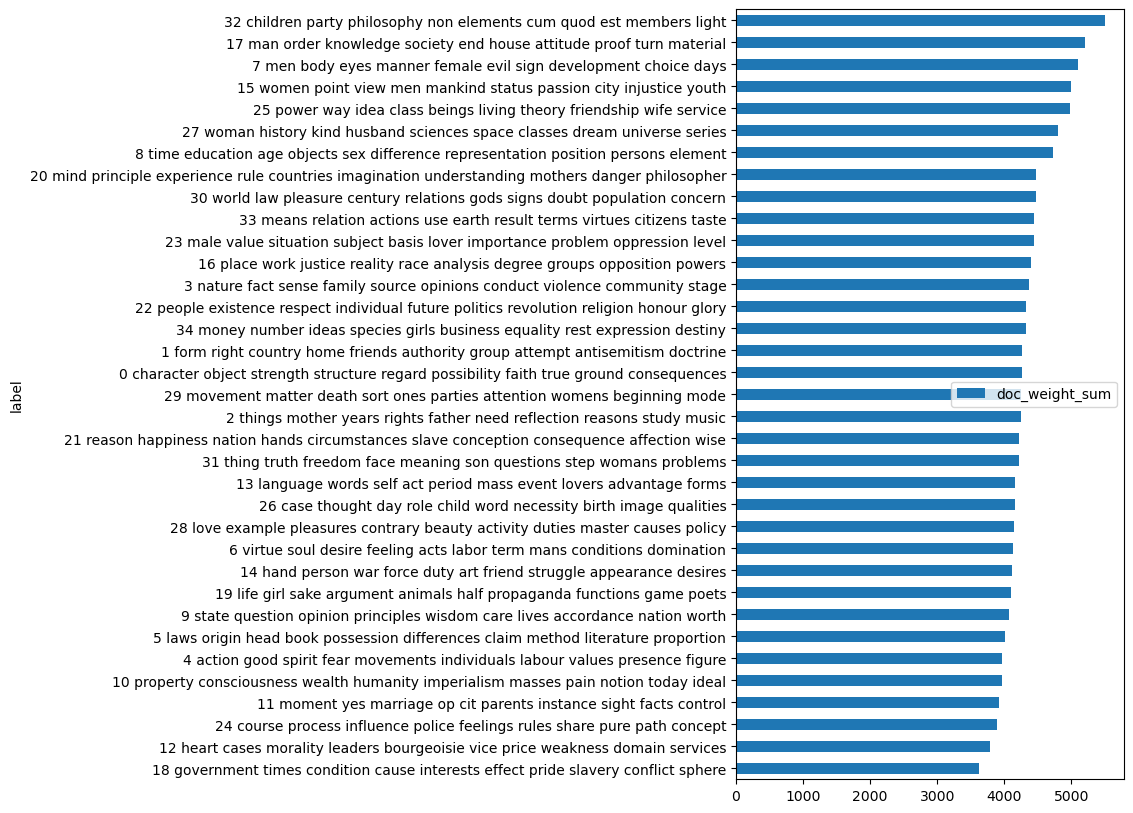

In [42]:
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS.sort_values('doc_weight_sum', 
                   ascending=True).plot.barh(y='doc_weight_sum', x='label', 
                                             figsize=(5,10)) 

In [43]:
#TOPICS_para['doc_weight_sum'] = THETA_para.sum()
#TOPICS_para.sort_values('doc_weight_sum', 
#                   ascending=True).plot.barh(y='doc_weight_sum',
#                                             x='label', 
#                                             figsize=(5,10)) 

In [44]:
#TOPICS_text['doc_weight_sum'] = THETA_text.sum()
#TOPICS_text.sort_values('doc_weight_sum', 
#                   ascending=True).plot.barh(y='doc_weight_sum',
#                                             x='label', 
#                                             figsize=(5,10)) 

#### Cluster Topics

In [45]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 640x480 with 0 Axes>

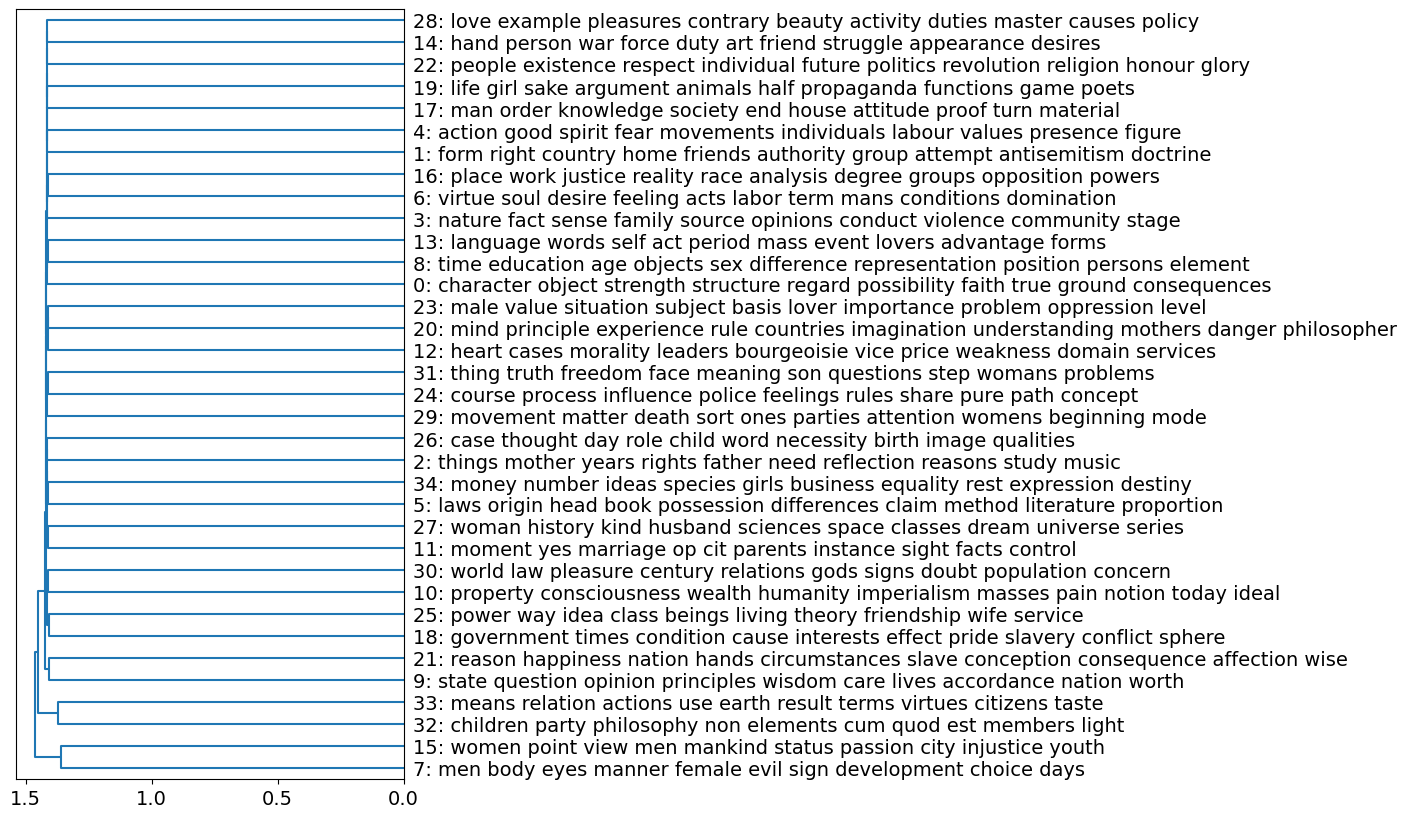

In [46]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

TOPICS['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
labels  = ["{}: {}".format(a,b) for a, b in zip(TOPICS.index,  TOPICS.topterms.tolist())]
plot_tree(TREE, labels)

### Explore Topics by Gender

In [47]:
topic_cols = [t for t in range(n_topics)]
GENDER = THETA.groupby('gender')[topic_cols].mean().T                                            
GENDER.index.name = 'topic_id'
GENDER.T

topic_id        0         1         2         3         4         5   \
gender                                                                 
F         0.026124  0.029112  0.027390  0.027882  0.025823  0.025227   
M         0.029688  0.027141  0.028406  0.029424  0.026360  0.027291   

topic_id        6         7         8         9   ...        25        26  \
gender                                            ...                       
F         0.026177  0.033860  0.029377  0.026869  ...  0.032483  0.027685   
M         0.028060  0.033282  0.032588  0.026734  ...  0.032985  0.026988   

topic_id        27        28        29        30        31        32  \
gender                                                                 
F         0.036153  0.028001  0.030501  0.028641  0.027024  0.027646   
M         0.027631  0.026595  0.025748  0.030037  0.028336  0.043634   

topic_id        33        34  
gender                        
F         0.022592  0.029335  
M         0.035015  0.027579  

[2 rows x 35 columns]

In [48]:
GENDER['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
GENDER.sort_values('F', ascending=False).style.background_gradient()

In [49]:
GENDER.sort_values('M', ascending=False).style.background_gradient()

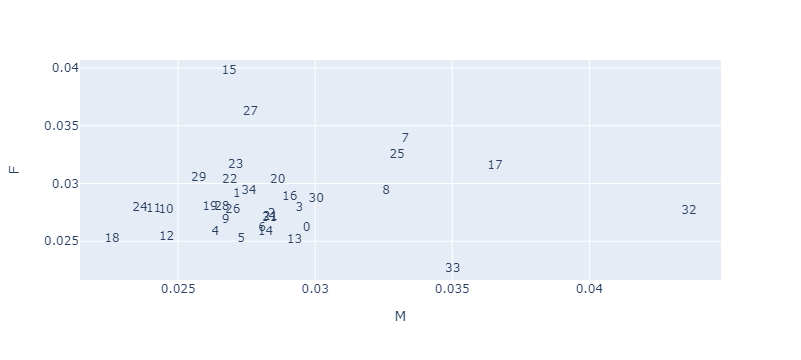

In [50]:
px.scatter(GENDER.reset_index(), 'M', 'F', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

#### Cluster

<Figure size 640x480 with 0 Axes>

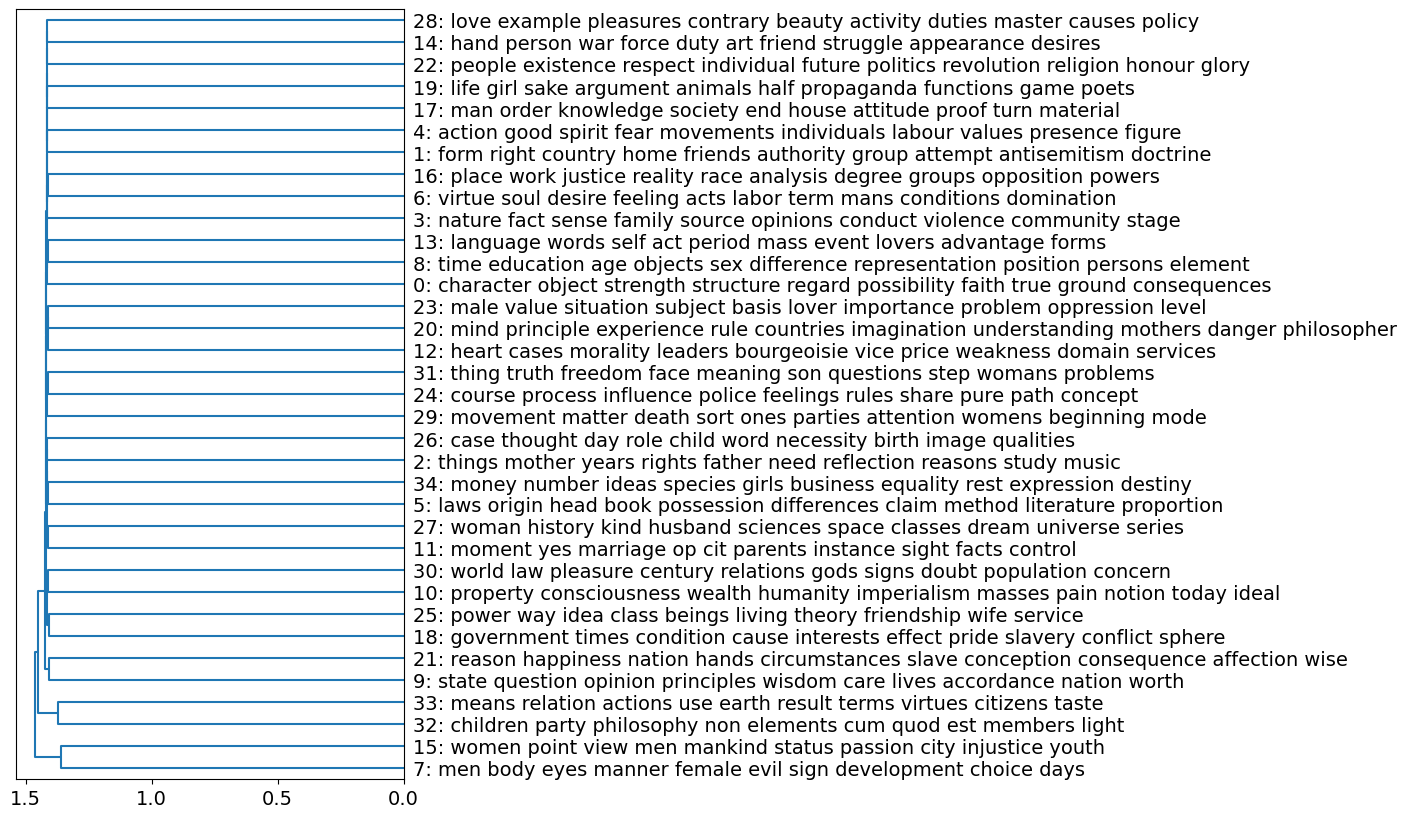

In [51]:
labels  = ["{}: {}".format(a,b) for a, b in zip(GENDER.index,  GENDER.topterms.tolist())]
plot_tree(TREE, labels)

#### Analysis
....

### Explore Topics by Era

In [52]:
ERA = THETA.groupby('era')[topic_cols].mean().T                                            
ERA.index.name = 'topic_id'
ERA.T

topic_id         0         1         2         3         4         5   \
era                                                                     
ancient    0.026826  0.025032  0.030386  0.027106  0.026123  0.026677   
classical  0.030005  0.028449  0.025651  0.033877  0.026190  0.027024   
modern     0.027912  0.029171  0.027631  0.027781  0.026080  0.025977   

topic_id         6         7         8         9   ...        25        26  \
era                                                ...                       
ancient    0.030375  0.036011  0.029771  0.030370  ...  0.029951  0.024424   
classical  0.029252  0.031809  0.031822  0.027305  ...  0.035439  0.025746   
modern     0.025257  0.033084  0.031404  0.025193  ...  0.033070  0.028962   

topic_id         27        28        29        30        31        32  \
era                                                                     
ancient    0.022648  0.028486  0.024280  0.026536  0.028007  0.064518   
classical  0.025807  0.029287  0.024222  0.028812  0.028710  0.026887   
modern     0.037000  0.026129  0.030596  0.030717  0.027309  0.027509   

topic_id         33        34  
era                            
ancient    0.041204  0.025844  
classical  0.028530  0.029649  
modern     0.024573  0.029053  

[3 rows x 35 columns]

In [53]:
ERA['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)
ERA.sort_values('modern', ascending=False).style.background_gradient()

In [54]:
ERA.sort_values('ancient', ascending=False).style.background_gradient()

In [55]:
ERA.sort_values('classical', ascending=False).style.background_gradient()

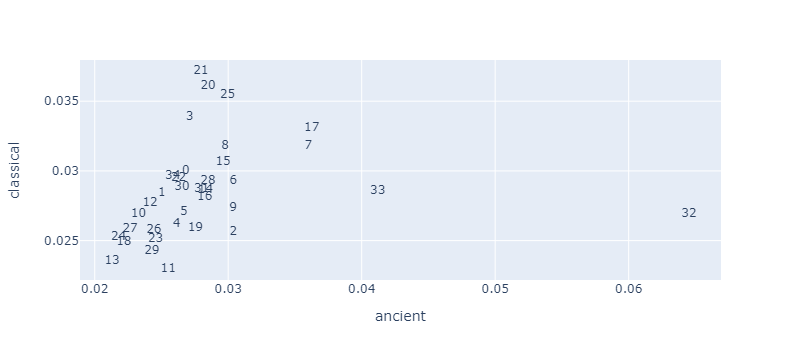

In [56]:
#scatter plot looking at distribution of topics of ancient and classical texts
px.scatter(ERA.reset_index(), 'ancient', 'classical', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

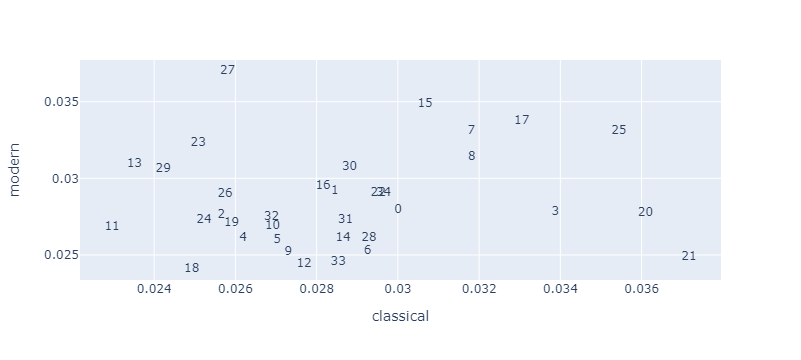

In [57]:
#scatter plot looking at distribution of topics of classical and modern texts
px.scatter(ERA.reset_index(), 'classical', 'modern', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

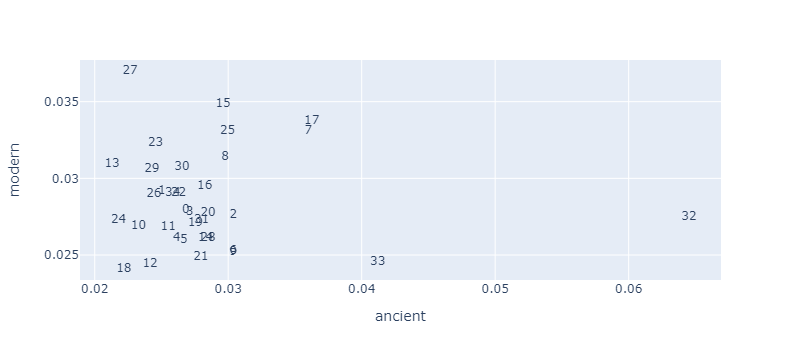

In [58]:
#scatter plot looking at distribution of topics of ancient and modern texts
px.scatter(ERA.reset_index(), 'ancient', 'modern', hover_name='topterms', text='topic_id')\
    .update_traces(mode='text')

<Figure size 640x480 with 0 Axes>

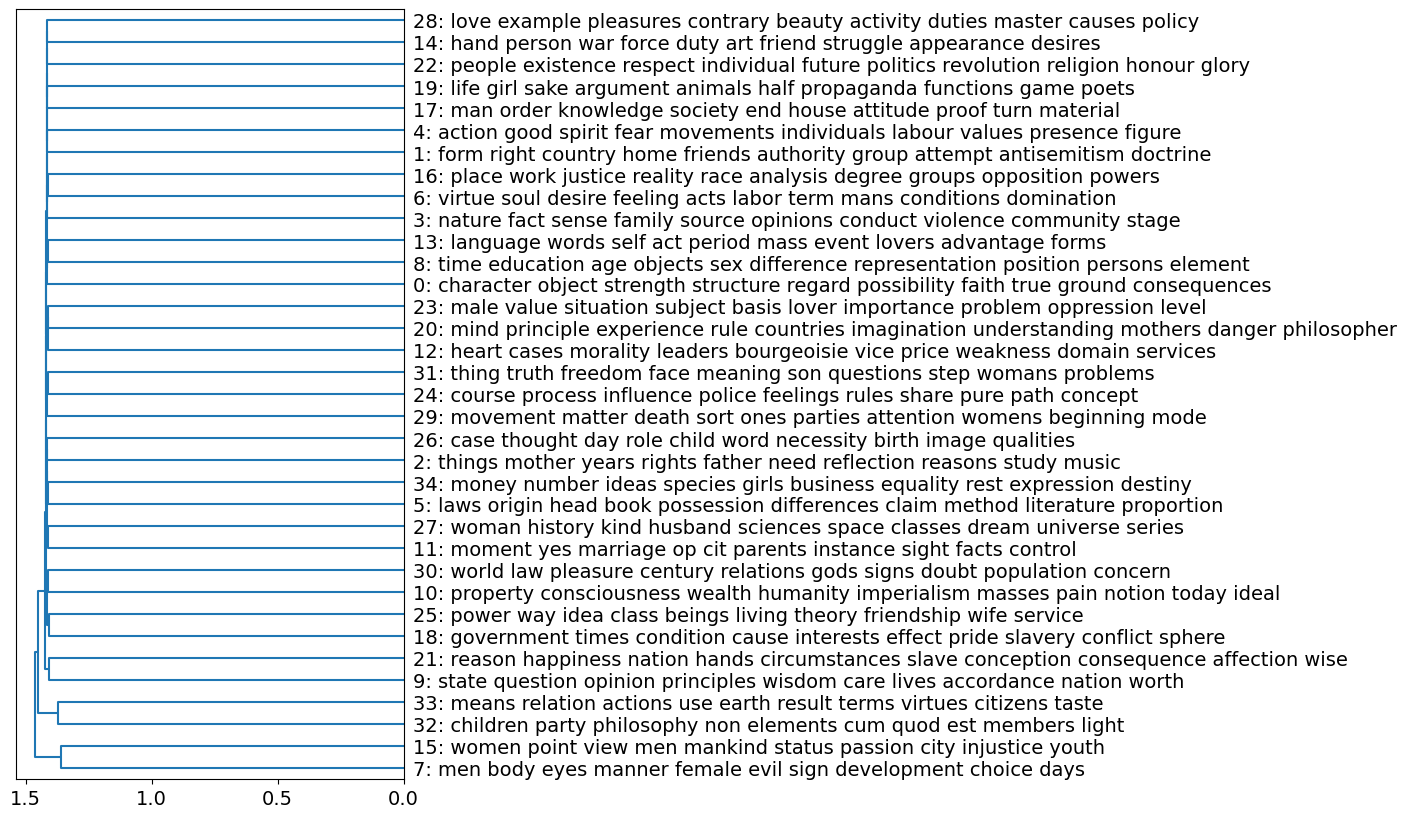

In [59]:
labels  = ["{}: {}".format(a,b) for a, b in zip(ERA.index,  ERA.topterms.tolist())]
plot_tree(TREE, labels)


#### Analysis
....